In [59]:
import numpy as np
from numpy import round
from numpy import pi
import matplotlib.pyplot as plt
%matplotlib inline

# derivation of temperature in laminair tube
Nu = 3.66

$\dot{Q} = -k A_r \frac{dT}{dr} = - k 2 \pi r l \frac{dT}{dr}$

$\dot{Q} \frac{dr}{r} = -k \pi l dT$

$\dot{Q} = 2 k \pi l \frac{T_1-T_2}{ln{r_2/r_1}}$

In [86]:

T_omg = 150 #degC omgevings temp
T_tol = 2 #degC tolerantie
T_in = 25 #degC

k = 6.13e-1 #W/mK
cp = 4.18e3 # J/kgK
Nu = 3.66 #default for lam with constant T @ wall

q  = (1500/3600)*1e-6 #m3/s
rho = 1000 #kg/m3
mu = 8.55e-4 #Ns/m2    
r_in = 1/4 * (1/2*25.4*1e-3) #m diameter
r_out = r_in + 3e-3 #add wall thickness
l = 16 #m length of tubing

u = q/(pi*r_in**2) #m/s
Re = rho/mu * u * r_in*2 
h = Nu*k/(r_in*2)
print("d_in", r_in*2, "u",u,"Re", Re,"h", h )


d_in 0.00635 u 0.013156834942599902 Re 97.71450512925074 h 353.3196850393701


In [87]:
def t_fluid(m, cp, t0,t_wall, l, R) :
    #assuming constant temperature at wall
    Nu = 3.66
    U = 1/(sum([1/x for x in R]))
    A = pi*2*r*l
    return t_wall-((t_wall-t0)*np.exp(-U*A/(m*cp)))

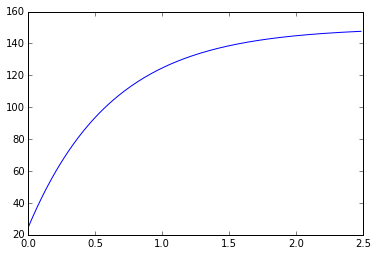

In [88]:
plt.plot([t/60 for t in range(150)], [(t_fluid(q*rho, cp, 25, 150, t*u, [h])) for t in range(150)])